In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# DEcision tree and random model 
incase of titanic we need to predict who survived and who died 


In [5]:
!pip install pyforest

  Stored in directory: C:\Users\Eagle3y3\AppData\Local\pip\Cache\wheels\b5\6f\28\9dd3fc38ca88e9c30712fc6c61aa83dca4dc496c82136c38f2
Successfully built pyforest


In [13]:
from pyforest import *

In [14]:
train=pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/supervised classificaton/train.csv")

In [15]:
test=pd.read_csv("C:/Users/Eagle3y3/Desktop/datascience program py/supervised classificaton/test.csv")

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# train will have n columns and test will get n-1 


# end to end modelling Process
1.hypothesis around th data set 
to check  hypo we perform eda 
#### eda
1.univariate analysis
2.bivariate analysis 
3.missing values and their imputation
4.outlier treatment
5.feature engineerin 
6.data pre_processing step - apply normalization /standrardization



#first model-everyone died -0.62
#### lets perform eda
if the column is holding binary or categorical value make a count plot else if its a numerical in nature create histogram


In [24]:
#univariate analysis when u perform this always catch the target variable first 
# it shows the frequency
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

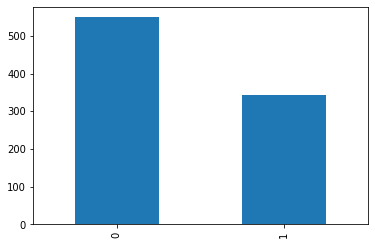

In [25]:
train.Survived.value_counts().plot(kind='bar')
plt.show()

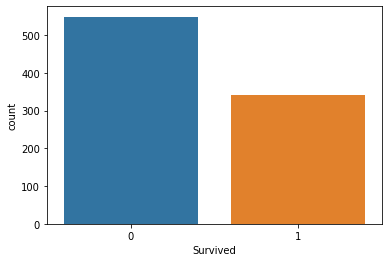

In [26]:
sns.countplot(train['Survived'])

In [27]:
#ratio\
train.Survived.value_counts()/train.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [30]:
train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

# T transpose

In [32]:
pd.DataFrame(train.groupby("Sex")["Survived"].value_counts()).T
# female has better survival chance then males

Sex      female     male     
Survived      1   0    0    1
Survived    233  81  468  109

# model 2 -all females survived

In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
def female(x):
    if(x=='female'):
        return(1)
    if(x=='male'):
        return(0)

In [ ]:
#test.Sex.apply(female)
#preparing data for kaggle submission
#converting to csv 

In [37]:
solution=pd.DataFrame({"PassengerId":test.PassengerId,"Survived":test.Sex.apply(female)})

In [38]:
solution.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
#compatiable with data frame only
#cd u will get where the file is stored 
solution.to_csv("Female Survived.csv",index=False)

In [41]:
cd

C:\Users\Eagle3y3


### accuray will be 76% check from kaggle  this is everything without using machine learning 

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


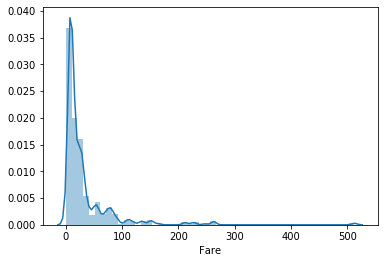

In [48]:
#univariate analysis 
#checking fare
#numercial column
sns.distplot(train['Fare'])

In [49]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

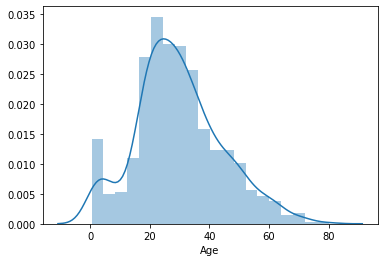

In [51]:
sns.distplot(train.Age.dropna())
#so age has missing values
#numeric column

In [53]:
#going to categorical
#embarked where they boarded the ship
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

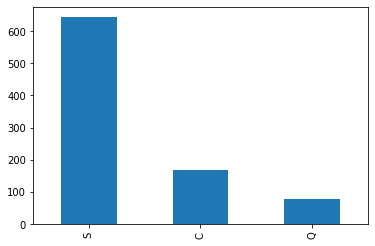

In [54]:
train.Embarked.value_counts().plot(kind='bar')
\#majority of the people embarked from south hampton 

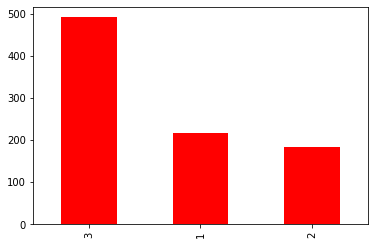

In [56]:
#Pclass 
train.Pclass.value_counts().plot(kind='bar',color='red')
#here we see the majority passenger on the board of titanic are 3rd class passeneger 

In [57]:
#missing values
train.isnull().sum().sum()

866

In [59]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
train.shape

(891, 12)

In [60]:
train.SibSp.value_counts()
#in sibsp sigle is higher 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [61]:
train.Parch.value_counts()

#single appeared in parc which should not be there 
#parent and children you cannot be travel allow 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### finding in univariate analysis 
1.single appearing in parch which should be 1 minimum
2.missing values were seen in age and cabin
3.majority passenger are 3class
4.most female pattern survived observed 
5.majority peope embarked from south hampton
6.fare and age appear to be skewed 
where min fare is 0 dollars and max is 512 dollar with the average fare paid is 32


# bivariate analysis 


# we analyze the predictor with the targert
pred vs targ
1.num vs num -scatter plot
2.cat vs num -box plot 
3.cat vs cat-freq table 


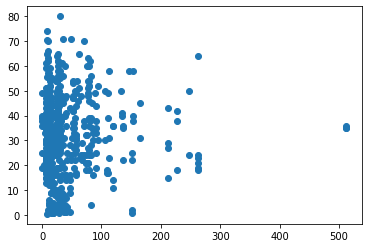

In [62]:
#scatter plot
plt.scatter(train.Fare,train.Age)

In [63]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# as the target variable is cat so we take it as x axis 
who surived is blue and those who died is orange 

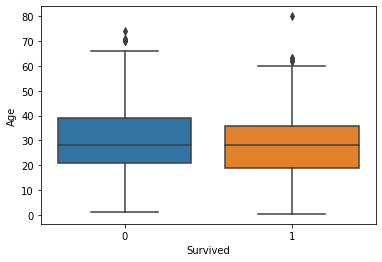

In [65]:
sns.boxplot(x='Survived',y='Age',data=train)

In [73]:
pd.DataFrame(train.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


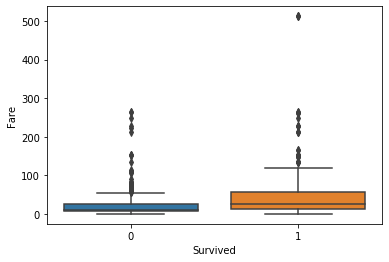

In [74]:
sns.boxplot(x='Survived',y='Fare',data=train)

In [75]:
pd.DataFrame(train.groupby('Survived')['Fare'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [76]:
#exploring zeroes in refrerence to their name and their titles
#as minimum fare was zero which doesnt xplain 



# do missing values before doing this 

# model-Descision treee
#drop nas.......


In [81]:
newtrain=train.dropna()
newtest=test.dropna()

In [ ]:
#cabin ticket and id get drop

In [85]:
newtrain.drop(['PassengerId','Ticket','Cabin'],inplace=True,axis=1)

C:\Users\Eagle3y3\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [86]:
newtest.drop(['PassengerId','Ticket','Cabin'],inplace=True,axis=1)

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [87]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:

newtrain.drop('Name',axis=1,inplace=True)

In [91]:
newtest.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [93]:
newtest.drop('Name',axis=1,inplace=True)

In [94]:
newtrain.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [96]:
dummytrain=pd.get_dummies(newtrain)
dummytest=pd.get_dummies(newtest)

In [97]:
dummytrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
6,0,1,54.0,0,0,51.8625,0,1,0,0,1
10,1,3,4.0,1,1,16.7000,1,0,0,0,1
11,1,1,58.0,0,0,26.5500,1,0,0,0,1


In [98]:
dummytest.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
12,1,23.0,1,0,82.2667,1,0,0,0,1
14,1,47.0,1,0,61.1750,1,0,0,0,1
24,1,48.0,1,3,262.3750,1,0,1,0,0
26,1,22.0,0,1,61.9792,1,0,1,0,0
28,1,41.0,0,0,30.5000,0,1,0,0,1


In [99]:
dummytrain.shape

(183, 11)

In [100]:
dummytest.shape

(87, 10)

In [101]:
xtrain=dummytrain.drop('Survived',axis=1)
ytrain=dummytrain.Survived

In [102]:
pred=dtree.fit(xtrain,ytrain).predict(dummytest)

# do this before doing decision tree

In [103]:
#missing values 
#embark 
#lets combine train and test it will be better to do it so we can get missing value treated together
combined=pd.concat([train,test],ignore_index=True,sort=False)

In [104]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [107]:
#embarked it shows row which has missing values nan
combined[pd.isnull(combined.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# now u can c that seeing pclass and survived and sex most people got in from south hampton so we will put s only 

In [109]:
combined[(combined.Pclass==1)& (combined.Survived==1) & (combined.Sex=='female')]['Embarked'].value_counts()

S    46
C    42
Q     1
Name: Embarked, dtype: int64

In [111]:
combined.Embarked.fillna("S",inplace=True )#fillna)

In [112]:
combined[combined.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [114]:
combined[combined.Name=='Storey, Mr. Thomas']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [118]:
combined[(combined.Sex=='male')&(combined.Pclass==3)&(combined.Embarked=='S')]['Fare'].describe()

count    365.000000
mean      13.145977
std       12.554548
min        0.000000
25%        7.795800
50%        8.050000
75%        9.845800
max       69.550000
Name: Fare, dtype: float64

In [119]:
#age we have to find the pattern 

In [120]:
combined[pd.isnull(combined.Age)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0.0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1.0,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0.0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [121]:
combined.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [122]:
combined['Fare'] = train['Fare'].astype(int)
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

train['Age2']=train['Age2'].astype(int)
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4

In [124]:
train.shape

(891, 12)

In [125]:
newtrain1=combined.loc[0:890,:]

In [126]:
newtest1=combined.loc[891:]

In [ ]:
xtrain=newtrain1.drop("Survived",axis=1)
ytrain=newtest1['Survived']

In [ ]:
input_train=newtrain1.drop(['PassengerId',"Name","Ticket","Cabin"],axis=1)

In [ ]:
input_test=newtest1.drop(['PassengerId',"Name","Ticket","Cabin"],axis=1)

In [ ]:
dummytrain=pd.get_dummies(input_train)
dummytest=pd.get_dummies(input_test)

In [ ]:
newtrain["Survived"] = newtrain.Survived.astype("int")
